# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

C:\Users\jassa\AppData\Local\Temp\ipykernel_28996\564799908.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Exploratieve Data Analyse (EDA)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.1 Uitleg van iedere kolom

0: id: uniek id van het persoon

1: age: leeftijd

3: hypertension: hoge bloeddruk (0 is nee, 1 is ja)

4: heart_disease: hart- en vaatziekten (0 is nee, 1 is ja)

5: avg_glucose_level: gemiddeld glucoselevel gemeten in mmol/L

6: bmi: bmi van de persoon 

7: gender_female: geslacht (True or False)

8: Gender_other: People who identify as something other than male or female

9: Every_married_no: geeft aan wie er niet getrouwd is.

10: Every_married_yes: geeft aan wie er wel getrouwd is.

11: Work_type_Govt_job: geeft aan wie er een baan heeft die te maken heeft met veiligheid van de bevolking.

12: work_type_never_worked: mensen die nooit gewerkt hebben.

13: work_type_private_work: mensen die privé werk doen.

14: work_type_Self_employed: mensen die eigen baas zijn.

15: work_type_children: kinderen tot 16 die werkzaam zijn.

16: Residence_type_rural: heeft de person een huis in een landelijk gebied. (True or False)

17: Residence_type_urban: heeft de persoon een huis in een stedelijk gebied. (True or False)

18: Smoking_status_formerly smoked: heeft de person in het verleden gerookt.  (True or False)

19: Smoking_status_never smoked: heeft de persoon ooit gerookt.  (True or False)

20: Smoking_status_smokes: Rookt de persoon momenteel actief.  (True or False)

21: Stroke: Heeft de persoon een beroerte gehad. (True or False)


### 1.2 Beschrijf in hoeverre de data voldoet aan de minimale vereisten voor Machine Learning met Scikit Learn

De data voldoet aan alle voorwaarde voor machine learning met Scikit learn.

- Het zijn numerieke waardes
- Er zijn geen missende waardes
- Het staat in een dataframe

In [3]:
display(train.head())
display(train.info())
display(train.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

None

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


In [ ]:
# Kijken of er missende data in de traindata zit
msno.matrix(train)

In [ ]:
# Kijken of er missende data in de testdata zit
msno.matrix(test)

### 1.2.1 maak de evenutele aanpassingen

Booleans omzetten naar 0 en 1

In [6]:
train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

### 1.3 Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties

We zien dat er tussen bepaalde kolommen een directe corrolatie is, bijvoorbeeld man en vrouw. Dit moet worden aangepast zodat er geen multicollineariteit is.

In [ ]:
plt.figure(figsize=(25, 18))
sns.heatmap(train.corr(), annot=True)

In [8]:
cat_cols = train.drop(['id', 'age', 'avg_glucose_level', 'bmi'], axis=1)
num_cols = train[['age', 'avg_glucose_level', 'bmi']]

In [ ]:
sns.pairplot(num_cols)
plt.show()

In [ ]:
for i in cat_cols:
    train[i].value_counts().plot(kind='bar')
    plt.show()

In [ ]:
for i in num_cols:
    sns.histplot(x=train[i])
    plt.show()

In [ ]:
for i in num_cols:
    sns.boxplot(x=train[i])
    plt.show()

### 1.3.1 Omgaan met outliers

bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn.

We bereken de Z-score en verwijderen hier dan de outliers

In [13]:
bmi_col = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(bmi_col))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = bmi_col[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen

In [14]:
train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,72295,75.0,1,0,215.17,48.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,26451,15.0,0,0,135.22,19.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,65210,47.0,0,0,64.89,28.2,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,69299,49.0,0,0,222.34,28.8,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9.0,0,0,109.80,14.5,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
33546,19648,47.0,0,0,88.61,30.8,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
33547,35550,3.0,0,0,89.68,16.2,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
33548,65453,56.0,1,0,82.44,27.8,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### 1.4 Beschrijf de belangrijkste bevindingen van de EDA

We hebben gezien dat de dataset erg unbalanced is maar dat de dataset verder redelijk normaal is verdeeld. We hebben een paar zware outliers bij BMI gevonden en hoeveel deze misschien in werklijkheid wel kunnen zijn deze sterk genoeg om te verwijderen. Verder is er een probleem met multicollineariteit, er zullen hier rijen verwijderd worden.

### 1.5 Sommige regels en/of kolommen zijn soms niet relevant voor machine learning. Schoon de data op zodat alleen relevante regels resteren

Zoals eerder gezegd worden de rijen die multicollineariteit veroorzaken verwijderd, ook de id kolom zal hier worden verwijderd.

We verwijderen de 'gender_Male' en 'gender_Other' kolommen. 'gender_Male' omdat we dit samenvoegen met de 'gender_female' kolom en hier gender van maken. Hier is 1 dan vrouw en 0 man. 'gender_other' wordt verwijderd omdat hier te weinig datapunten in zijn namelijk maar 6 van de 33206. 

Verder worden 'ever_married_No' en 'Residence_type_Rural' ook verwijderd en worden de verglijkbare kolommen een ja of nee kolom.

In [15]:

train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

In [16]:
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,30.0,0,0,63.60,33.3,0,0,0,0,1,0,0,0,0,0,1,0
1,75.0,1,0,215.17,48.0,1,1,0,0,0,1,0,0,0,1,0,0
2,15.0,0,0,135.22,19.0,0,0,0,0,1,0,0,0,0,1,0,0
3,47.0,0,0,64.89,28.2,0,1,0,0,0,1,0,1,0,1,0,0
4,49.0,0,0,222.34,28.8,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,9.0,0,0,109.80,14.5,0,0,0,0,0,0,1,0,0,0,0,0
33546,47.0,0,0,88.61,30.8,1,1,0,0,1,0,0,1,0,0,0,0
33547,3.0,0,0,89.68,16.2,1,0,0,0,0,0,1,0,0,0,0,0
33548,56.0,1,0,82.44,27.8,1,1,1,0,0,0,0,1,0,0,1,0


In [17]:
test_data_ids = test['id']

In [18]:
test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

### 1.6 Data sampling indien nodig

## Smote

Smote of Synthetic Minority Oversampling Technique is een vorm van oversamplen, dit werkt door synthetische data aan te maken op basis van de al bestaande data. Het probeert zo een unbalanced data set weer balanced te maken.

In [19]:
#from imblearn.over_sampling import SMOTE
#
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
#
#print(y_resampled.value_counts())


## ADASYN

In [20]:
#from imblearn.over_sampling import ADASYN
#
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#adasyn = ADASYN(random_state=42)
#X_resampled, y_resampled = adasyn.fit_resample(X, y)
#
#print(y_resampled.value_counts())

## Instance Hardness Threshold

IHT is een undersampling techniek dat samples met een lage kans verwijderd uit de dataset.

Dit werkt beter voor SVMs

In [21]:
from imblearn.under_sampling import InstanceHardnessThreshold


X = train.drop(columns=['stroke'])
y = train['stroke']

iht = InstanceHardnessThreshold(random_state=42, n_jobs=-1)
X_resampled, y_resampled = iht.fit_resample(X, y)

print(y_resampled.value_counts())

stroke
0    21711
1      515
Name: count, dtype: int64


## RepeatedEditedNearestNeighbours

In [22]:
#from imblearn.under_sampling import RepeatedEditedNearestNeighbours
#
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#renn = RepeatedEditedNearestNeighbours(n_neighbors=19, kind_sel='all', n_jobs=-1)
#X_resampled, y_resampled = renn.fit_resample(X, y)
#
#print(y_resampled.value_counts())

In [23]:
resampled_train = pd.DataFrame(X_resampled, columns=X.columns)
resampled_train['stroke'] = y_resampled
resampled_train.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000,22226.000000
mean,32.554551,0.031720,0.008908,95.725841,27.175772,0.612661,0.517682,0.108567,0.006029,0.581436,0.088770,0.215198,0.490282,0.121209,0.375596,0.134122,0.023171
std,19.616482,0.175257,0.093966,30.514191,7.174589,0.487153,0.499698,0.311102,0.077414,0.493335,0.284418,0.410969,0.499917,0.326378,0.484287,0.340791,0.150450
min,0.080000,0.000000,0.000000,55.010000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,77.062500,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,0.000000,0.000000,89.595000,26.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,105.520000,31.600000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,278.560000,51.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.7 Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit

Standaardiseren van de data zorgt ervoor dat de schaal overal gelijk is. Dit zorgt ervoor dat een kolom met een andere schaal niet veel te veel of veel te weinig invloed heeft op het model. Dit is vooral belangrijk voor afstandgebasseerde algoritmes zoals k-NN en SVM die we hier gebruiken. Voor Tree gebaseerde modellen of categorische variabelen is dit vaak niet nodig.

In [24]:
sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

Test set aanpassen

In [25]:
test = sc.fit_transform(test) 

# 2. Evaluatie

### 2.1 Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritme

Metrics: f1, recall, precision, accuracy

In [33]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=42) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=100)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("F1 score:",metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score: 0.5819672131147541
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



### 2.2 Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix

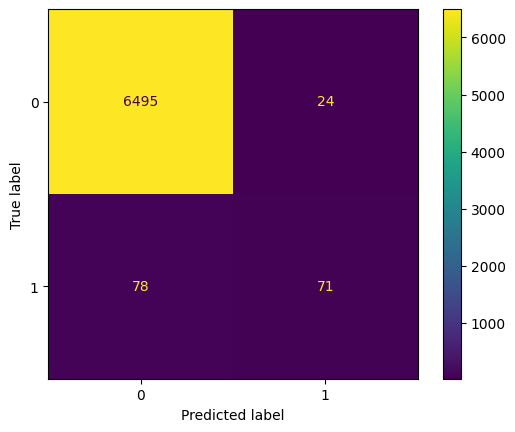

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels= [0,1])

cm_display.plot()
plt.show()

accuracy = ((True Positive + True Negative) / Total Predictions)

Precision = True Positive / (True Positive + False Positive)

Recall = True Positive / (True Positive + False Negative)

f1 = True Negative / (True Negative + False Positive)

### 2.3 In de Kaggle competitie zie je dat er is gekozen voor de f1-score om te beoordelen hoe goed een model presteert. Leg uit waarom f1-score voor dit vraagstuk de beste maatstaf is

De F1 score wordt gebruikt als je zowel hoge precision als recall wilt hebben. Accuracy meet ook hoeveel er correct predict zijn, echter werkt dit alleen goed met balanced data sets. Precision meet hoeveel positieve predictions correct zijn en recall meet hoeveel van de aanwezige positieve class samples correct zijn geindentificeerd.

De ene metric komt dus te koste van de ander. De F1 score combineerd deze, hierdoor heb je minder last van de unbalanced dataset en kan je je model efficient optimaliseren.

# 3. Modelleren en uitleg modellen

Pas cross-validation en hyperparameter tuning toe op ieder model.

Als je de beste hyperparameters voor een model hebt gevonden dan pas je het model met die hyperparameters toe op test.csv. De voorspellingen upload je op Kaggle om te zien hoe goed een model presteert.

De dataset is een “imbalanced dataset”. Leg uit waarom dit zo is. Er zijn meerdere technieken waarmee je voorspellingen voor zo’n dataset kunt verbeteren. Zonder toepassingvan deze technieken zullen je voorspellingen erg slecht zijn. Pas voor alle modellen ensembles minimaal 2 van deze technieken toe en leg uit hoe iedere techniek werk

## 3.1 KNN

In [91]:
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve

test = pd.read_csv('test.csv') 
train = pd.read_csv('train.csv')


bmi_col = train[['bmi']]
z_scores = np.abs(stats.zscore(bmi_col))
outliers = np.where(z_scores > 3)
outliers_rows = bmi_col[(z_scores > 3).any(axis=1)]
train = train.drop(outliers_rows.index)


X = train.drop(columns=['stroke', 'id'])
y = train['stroke']


oversample = ADASYN()
X_resampled, y_resampled = oversample.fit_resample(X, y)

sc = RobustScaler()
X_resampled = sc.fit_transform(X_resampled)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_prob = best_knn.predict_proba(X_val)[:, 1]
y_pred_custom_threshold = (y_prob >= 0.2).astype(int)
print("F1 Score", f1_score(y_val, y_pred_custom_threshold))
print("Classification Report:\n", classification_report(y_val, y_pred_custom_threshold))


test_features = test.drop(columns=['id'])
test_features = sc.transform(test_features)
test_prob = best_knn.predict_proba(test_features)[:, 1]

test_predictions = (test_prob >= 0.2).astype(int)
submission = pd.DataFrame({'id': test['id'], 'stroke': test_predictions})

submission.to_csv('KNN_pred_12.csv', index=False)

Kleine toelichting:
-   Functie predict_proba() 
    -   gebruikt om de waarschijnlijkheid voor stroke == 1 te verlagen naar 0.2, hierdoor krijgt een patient de classificatie stroke = 1 zodra de 'Probability' groter of gelijk is aan 20%, handmatig getest dat 0.2 het beste werkt op Kaggle. Ookal heeft 0.7 een hogere f1 score op de train set.
- ADASYN 
  - ADASYN genereert synthetische voorbeelden voor stroke = 1, het kijkt naar de minderheidsklasse (stroke = 1) en creeert nieuwe punten door de bestaande (stroke = 1) patienten te combineren met hun Neighbors --> nieuwe vergelijkbare punten onstaan tot dat er evenveel '1' waarden zijn dan '0' waarden in de kolom 'stroke'


#### 3.1.1 Leg uit hoe model werkt. Gebruik daarin onder andere termen “afstand”, “euclidean” en “manhattan

K-Nearest Neighbours (KNN) is een simpel algoritme die te gebruiken is voor classificatie en regressie problemen. Het werkt door de "K" nearest datapoints(Neighbors) voor een nieuwe punt te indentificeren op basis van een 'Afstand' hierover meer later. Een voorspelling word gedaan met gebruik van een meerderheidslabel (classification) of het gemiddelde (regression) van deze Neighbours.

Bij het gebruik van een KNN model is de afstand heel belangrijk en ook het aantal Neighbors omdat dit invloed kan hebben op de 'Fitting'

- Euclidean
  - Een rechte lijn tussen twee punten in een Euclidean space (multidimensionale ruimte) dit wordt gedaan met de formule:
$$
d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{ \sum_{k=1}^{n} (x_{ik} - x_{jk})^2 }
$$
  - Het werkt vooral goed in laag dimensionale ruimten omdat het verschil tussen punten minder betekenisvol zijn in hoge dimensies. Minder kolommen is dus beter voor Euclidean distance
- Manhattan
  - Manhattan distance is bekend als stadsblokafstand en daarom ook genaamd naar Manhattan omdat Manhattan van boven erg veel lijkt op de manier waarop de distance word berekent. In het kort ga je een afstand berekenen door een echte route te lopen in plaats van Euclidean die dwars door gebouwen heen gaat:
  - de formule:

$$d(P, Q) = |q_1 - p_1| + |q_2 - p_2|$$

Voor meer dan 2 dimensies:

$$d(P, Q) = \sum_{i=1}^{n} |q_i - p_i|$$

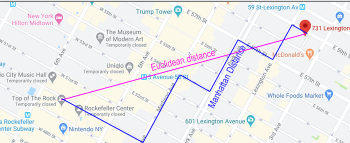

[source](https://www.translatorscafe.com/unit-converter/bg/calculator/two-points-distance/?D=2&x1=3&y1=3.5&x2=-5.1&y2=-5.2)
  - Deze afstand is de som van de absolute verschillen tussen punten in alle dimensies en wordt berekent met : 
  - Manhattan distance is minder gevoelig tegen multidimensionale ruimtes omdat het geen kwadraten berekent maar de absolute verschillen optelt.


- [Weights](https://visualstudiomagazine.com/articles/2019/04/01/weighted-k-nn-classification.aspx) [additional source](https://towardsai.net/p/l/understanding-k-nearest-neighbors-a-simple-approach-to-classification-and-regression)
  - Uniform(default)
    - Bij het gebruiken van Uniform als gewicht zorg je dat elk van de 'K' Neighbors evenveel bijdraagt aan het resultaat. Oftewel, een punt die dichtbij ligt heeft even veel invloed als een punt die ver ligt.
  - Distance
    - Bij het gebruiken van Distance als gewicht heeft de afstand van de 'K' Neighbors invloed op hoeveel het bijdraagt aan het resultaat. De afstand word berekent met  1/d  en d = afstand tot Neighbour. 
- Voorbeeld :

| Punt   | Klasse   | Afstand | Gewicht (Uniform) | Gewicht (Distance) |
|--------|----------|---------|-------------------|-------------------|
| Punt 1 | Klasse A | 5       | 1                 | 0.2               |
| Punt 2 | Klasse A | 7       | 1                 | 0.14              |
| Punt 3 | Klasse B | 1       | 1                 | 1.0               |

- Uniforme gewichten: Klasse A , want de som van de gewichten voor Klasse A (1+1) is groter dan die voor Klasse B (1).
- Afstandsgewichten: Klasse B , want de som van de gewichten voor Klasse A (0.2 + 0.14 = 0.34) is kleiner dan die voor Klasse B (1.0).


- ['K' Waarde](https://www.kdnuggets.com/2022/07/knearest-neighbors-scikitlearn.html)
  - De waarde van 'k' is van cruciaal belang voor de prestaties van het model. Een kleine 'k' kan leiden tot overfitting omdat het model hierdoor gevoelig wordt voor ruis, terwijl een grote 'k' de voorspellingen kan overdrijven en subtiele patronen kan negeren. Meestal worden oneven waarden van 'k' gekozen om verbanden in de classificatie te vermijden

KNN is makkelijk te impelemnteren en te begrijpen maar normaal gesproken gaan prestaties achteruit in hoogdimensionale datasets(in dit geval valt het mee). het schalen van functies zoals standaardisatie is vaak nodig om ervoor te zorgen dat de distance metrics nog meaningful zijn.
  
​


### 3.1.2 Leg uit waarom standaardisatie voor dit model van groot belang

**schaalverschillen tussen variabelen**
  
  bijvoorbeeld bij de waarden van glucose varieren van ongeveer 60 tot 200, terwijl BMI-waarden tussen 18 en 50 liggen. Zonder standaardisatie kan een variabele met grotere waarden, zoals glucose, zullen dus meer inpact hebben in de afstandsberekeningen. Dit betekent dat de KNN voornamelijk gebaseerd zal zijn op glucose, waardoor variabelen zoals BMI en leeftijd weinig impact hebben op het eindresultaat.
Dit zorgt ervoor dat alle variabelen op een vergelijkbare schaal zijn. Hierdoor kunnen bijv Glucose en BMI gelijk bijdragen aan de afstandsberekeningen.

### 3.1.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}

### 3.1.4 Leg uit hoe regularisatie werkt voor dit model

  - Regularisatie is een manier om overfitting te voorkomen en om modellen te verbeteren, bij K-Nearest Neighbors kan je het toepassen door de complexiteit van het model aan te passen door bijvoorbeeld parameters zoals aantal neighbors of Weights te veranderen en optimaliseren.
    - 'k' Neighbors
      - een belangrijk manier om KNN te regulariseren is door het aantal neighbors(k) te kiezen. Dit bepaald hoeveel datapunten invloed hebben op een voorspelling, een klein 'k' betekent dat het model erg gevoelig is bij kleine variaties --> overfitting. Een groot 'k' maakt het model minder gevoelig en kan overfitting verminderen tot een limiet, zodra je een te hoog 'k' hebt kan leiden tot underfitting waardoor je patronen in data niet inrekent. 
    - Weights
      - Bij 3.1.1 al uitgebreidt uitgelegd met een voorbeeld, in het kort kan je ervoor kiezen of je alle Neighbors(k) gelijk laat wegen of te wegen op basis van hun afstand  tot het nieuwe punt. In 'Distance' Weight hebben neighbours die dichterbij liggen meer invloed op de voorspelling, dit helpt om invloed van minder relevante buren te verminderen.
    - Ik maak gebruik van GridSearchCV om de beste parameters voor mijn KNN model te vinden, hierbij gebruik ik verschillende parameters waaronder  Neighbors(k), Weights, Metric en 'p'
      - 'p' is belangrijk voor de metric Minkowski, een afstandsmaat die aan de hand van de waarde 'p' kiest waarbij de macht wordt verhoogd bij Manhattan distance. p=1 is bijvoorbeeld hetzelfde als Manhattan distance. In mijn geval werkt p = 3 het beste en de formule gaat als volgt: $D(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^3 \right)^{1/3}$
        - Voorbeeld: Stel dat je twee punten hebt:  x = (2, 3, 5) en y = (4, 1, 6), dan wordt de Minkowski voor p = 3 als volgt berekend:

$$
D(x, y) = \left( |2 - 4|^3 + |3 - 1|^3 + |5 - 6|^3 \right)^{1/3}
$$

$$
D(x, y) = \left( 2^3 + 2^3 + 1^3 \right)^{1/3}
$$

$$
D(x, y) = \left( 8 + 8 + 1 \right)^{1/3}
$$

$$
D(x, y) = \left( 17 \right)^{1/3}
$$

$$
D(x, y) \approx 2.571
$$


## 3.2 Logistic Regression

### 3.2.1 Leg uit hoe het model werkt

### 3.2.2 Toon de wiskundig formule voor de loss-functie en ligt deze toe

### 3.2.3 Leg uit wat gradient descent is in deze context. Leg dit uit aan de hand van een eenvoudig rekenvoorbeeld en geef hierbij de relevant wiskundige formules

### 3.2.4 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

### 3.2.5 Beschrijf hoe regularisatie zich verhoudt ten opzichte van overfitting

### 3.2.6 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

## 3.3 SVM

In [44]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from imblearn.under_sampling import InstanceHardnessThreshold

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

bmi_col = train[['bmi']]
z_scores = np.abs(stats.zscore(bmi_col))
outliers = np.where(z_scores > 3) 
outliers_rows = bmi_col[(z_scores > 3).any(axis=1)] 
train = train.drop(outliers_rows.index)


train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True)
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True)

test_data_ids = test['id']

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True)
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True)


test = sc.fit_transform(test) 

X = train.drop(columns=['stroke'])
y = train['stroke']

iht = InstanceHardnessThreshold(random_state=42, n_jobs=-1)
X_resampled, y_resampled = iht.fit_resample(X, y)

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

print(y_resampled.value_counts())

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=42) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=100)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("F1 score:",metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

stroke
0    21711
1      515
Name: count, dtype: int64
F1 score: 0.5819672131147541
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



In [32]:
SVM_pred = clf.predict(test)
SVM_pred_df = test_data_ids.to_frame()
SVM_pred_df['stroke'] = SVM_pred
SVM_pred_df.to_csv('SVM_pred_13.csv', index=False)

### 3.3.1 Beschrijf de werking van dit model. Toon hierbij de relevante wiskundige formules en leg ze uit aan de hand van een rekenvoorbeeld. Gebruik hierbij een klein deel van de dataset. Leg ook uit wat een kernel is en wat de kernel trick is

Een SVM werkt door data in kaart te kunnen brengen op in een hogere dimensie. Stel je een grafiek voor waar een lijn doorheen gaat om te classes te bepalen, een svm kan hier extra dimensies aan toevoegen waardoor het bij 1 extra bijvoorbeeld een vlak wordt.



**Rekenvoorbeeld en kernel trick uitleg**

### 3.3.2 De wiskundig formule voor de loss functie en de regularisatie

$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i f(\mathbf{x}_i)) 


### Toelichting: 
1. **L2 Regularisatie** 
```math
\left(\frac{1}{2} ||\mathbf{w}||^2\right)
```
   - Dit zorgt voor kleine gewichten, het maximaliseerd de marge tussen de 2 classes. Een kleinere ||w|| betekent een kleinere marge, dit zorgt voor meer generalisatie en minder overfitting.


2. **C Parameter of "Soft Margin Regularisatie" (C=100)**:
   - Een hoge C waarde (in dit geval, 100) betekent dat het model een hogere nadruk legt op het minimaliseren van foute classificaties.
   - Dit zou kunnen leiden to overfitten als het model te goed leert te werken op de trainingdata, dit komt doordat de 'decision boundary' te complex wordt om te generaliseren. In ons geval werkt dit nog vrij goed.

3. **Hinge Loss** 
```math
\left(\max(0, 1 - y_i f(\mathbf{x}_i))\right)
```

   - De hinge loss zorgt er voor dat de punten die correct geclassificeerd zijn buiten het marge geen loss toevoegen.
   - Als een punt binnen de marge of fout geclassificeerd is, groeit de loss exponentieel in proportie met hoe fout die is.



### 3.3.4 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import scipy.stats

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['rbf'],
              'C' : [0.1, 1, 10, 50, 100, 150,],
#              'class_weight': ['balanced', None],
#              'degree': [1, 2, 3], alleen relevant voor polynominal
#              'gamma': ('scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1, 10),
#              'probability': [True]
#              'decision_function_shape': [ 'ovo', 'ovr'], Maakt niet uit voor binary probleem
#              'break_ties': [True, False] geen multiclass probleem dus niet relevant
              }

grid_dt = GridSearchCV(svm.SVC(),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_svm = grid_dt.best_estimator_
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

#y_proba = best_svm.predict_proba(X_test)[:,1]
#y_predi_custom_threshold = (y_proba >= 0.5).astype(int)
print("F1 Score", f1_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))


Best hyerparameters:
 {'C': 100, 'kernel': 'rbf'}
F1 Score 0.5819672131147541
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



## 3.4 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import InstanceHardnessThreshold

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_data_ids = test['id']

num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen
train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

X = train.drop(columns=['stroke'])
y = train['stroke']

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], # Beide 'criterions' proberen
              'splitter': ['best', 'random'], # Manieren van splitsen
              'max_depth': [None, 5, 10, 20, 30], # Maximale diepte van de tree
              'min_samples_split': [2, 5, 10, 20], # Minimaal aantal samples om door te splitsen
              'min_samples_leaf': [1,2,3, 5, 10], # Minimaal aantal samples in een leaf
              'max_features': [None, 'sqrt', 'log2'], # Manieren om features uit te kiezen
              'max_leaf_nodes': [None, 10, 20, 30], # Maximale aantal nodes
              'ccp_alpha': [0.001, 0.01, 0.1, 0.0], # Pruning strategie
dt_cv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_cv.fit(X, y) 

dt_cv.best_params_, dt_cv.best_score_

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 5, min_samples_split = 2, min_samples_leaf = 10, max_leaf_nodes = 10, max_features = None, ccp_alpha=0.001, class_weight={0: 1, 1: 58}, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Decision_pred = dt.predict(test)
Decision_pred_df = test_data_ids.to_frame()
Decision_pred_df['stroke'] = Decision_pred
Decision_pred_df.to_csv('Decision_pred_v12.csv', index=False)
#Beste kaggle score tot nu toe: 0.04147 (met smote)
#dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 16, min_samples_split = 2, min_samples_leaf = 1, max_features = 12, random_state=42)
print(classification_report(y_test, y_pred))


### 3.4.1 Beschrijf de werking van dit model

Een decision tree is een model die op basis van een boomdiagram een class voorspelt. Dit wordt gedaan door middel van een reeks beslissingen. Elke "node" boom stelt een vraag over een feature van de data en op basis daarvan ga je een stap verder in de beslisboom. Dit gaat zo door tot je uiteindelijk bij de leafes van de boom komt die de voorspeelde uitkomst / class aangeven.

### 3.4.2 Beschrijf de criteria op basis waarvan de splitsingen in de beslisboon kunnen worden gemaakt

Bij een decision tree is het van cruciaal belang dat er wordt bepaald op welke features er gesplitst moet worden en hoe deze vervolgens gemaakt moeten worden. Dit wordt gebaseerd op verschillende maatstaven. Twee opties zijn:

Information gain:

Entropie meet de mate van onzuiverheid in de data. Het geeft aan hoe gevarieerd de klassen zijn in een dataset.

Als de dataset puur is (alle voorbeelden behoren tot dezelfde klasse), is de entropie laag (0). Als de dataset perfect gemengd is (gelijke aantallen voorbeelden van elke klasse), is de entropie hoog (maximaal).

Information gain is het verschil in entropie voor en na het splitsen van de data op een bepaald kenmerk. Het geeft aan hoeveel informatie je "wint" door die specifieke splitsing te maken. Als het de information gain hoger is, is het beter om op dit model te splitsen.

In elke stap van het bouwen van de decision tree, wordt voor elk kenmerk de information gain berekend. Het kenmerk met de hoogste information gain wordt gekozen om de data op te splitsen, omdat het de grootste vermindering in entropie geeft. Dit blijft worden gedaan tot er uiteindelijk geen nieuwe splitsingen meer kunnen worden gemaakt (of als er geen verbetering in het model meer mogelijk is)

Gini Impurity:

De Gini-Impurity is nog een maatstaf die vaak wordt gebruikt om te bepalen welke splitsing het beste is bij het bouwen van een decision tree classifier. In plaats van dat er entropie wordt gebruikt, meet deze maatstaaf de kans dat een willekeurig gekozen voorbeeld onjuist zou worden geclassificeerd op basis van de verdeling van de klassen in de dataset.

Bij elke stap van het proces van een decision tree wordt de Gini-Impurity voor elk mogelijke splitsing berekend. Vervolgens kiest het model de splitsing die de grootste reductie in Gini-Impurity oplevert. Dit houdt in dat de data na elke splitsing zuiverder wordt. Bij elke stap in het bouwproces van een decision tree berekent het algoritme de Gini-impurity voor de huidige

Ook dit proces wordt herhaald voor elke stuk van de data, waarbij de boom steeds verder wordt opgesplitst totdat de Gini-impurity voor de "leafs" laag genoeg is of totdat er geen verdere splitsingen meer nodig zijn.

https://medium.com/@arpita.k20/gini-impurity-and-entropy-for-decision-tree-68eb139274d1

https://victorzhou.com/blog/information-gain/

https://victorzhou.com/blog/gini-impurity/


### 3.4.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.4.4 Leg uit wat ‘pruning’ is en beschrijf welke vormen hiervan zijn toegepast. Leg de relatie tussen ‘pruning’ en ‘underfitting / overfitting’ uit

Pruning is een techniek die wordt gebruikt om decision trees te vereenvoudigen en overfitting te voorkomen. Een model is overfit wanneer het te goed past op de trainingsdata, maar slecht resulteert / generaliseert op nieuwe data. Bij pruning worden overbodige delen van de decision tree die weinig of geen toegevoegde waarde hebben voor de voorspelling verwijdert. Dit vereenvoudigt het model, zodat het beter presteert op nieuwe data en dus minder zal overfitten.

In ons model maken we gebruik van pre-pruning. Dit betekent het "groeiproces" van de boom vroegtijdig wordt gestopt, voordat de boom volledig is gesplistst. Dit hebben we gedaan aan de hand van vooraf bepaalde parameters (die we hebben berekend met de gridsearch).

De methoden die wij hebben gebruikt zijn:

-Max_depth: Het proces stopt wanneer de boom een bepaalde diepte bereikt. Diepere bomen kunnen overfitting veroorzaken, dus een maximale diepte beperken voorkomt dit.
-Min_samples_split: dit is het aantal samples dat minimaal nodig is om een "node" te splitten. Bij te weinig samples zal de tree dus neit verder doorgroeien.
-Min_samples_leaf: het minimaal aantal samples dat een "leaf" moet hebben. Ook dit help met de grootte van de decision tree.

Relatie tussen Pruning en Underfitting / Overfitting:

Overfitting: een decision tree is overfit, wanneer het teveel leert van de trainingsdata en dus slecht generaliseert op nieuwe data. Door middel van pre-pruning wordt overfitting vermindert, door de bovenstaande technieken toe te passen.

Underfitting: het kan ook zo zijn dat je een model underfit door gebruik te maken van pre-pruning. Als je niet een gridsearch doet en dus niet de juiste parameters gebruikt bij het trainen van een model, kan het zijn dat je het model te simpel maakt en het dus niet in staat is om dingen goed te voorspellen.

https://medium.com/@abhishekjainindore24/pre-pruning-and-post-pruning-in-decision-trees-a-comprehensive-guide-391fd3682883

https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html


## 3.5 Ensembles  (Random Forest, Gradient Boosted Boosted Decistion Trees en XGboost)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_data_ids = test['id']

num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen
train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

X = train.drop(columns=['stroke'])
y = train['stroke']

#smote = SMOTE(random_state=0)
#X_resampled, y_resampled = smote.fit_resample(X, y)
#
#print(y_resampled.value_counts())
#
#sc = StandardScaler()
#
#X_resampled = sc.fit_transform(X_resampled) 

oversample = ADASYN()
X_resampled, y_resampled = oversample.fit_resample(X, y)

print(y_resampled.value_counts())

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [10,20,30,40,50],'criterion': ['gini', 'entropy'], 'max_depth': [3,5,7,9,11,13,15], 'min_samples_split': [5,10,15,20], 'min_samples_leaf': [5,10,15,20], 'max_features': ['sqrt', 'log2']}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_cv.fit(X, y) 

rf_cv.best_params_, rf_cv.best_score_

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_samples=None, bootstrap=True, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("F1 Score:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
rf_pred = rf.predict(test)
rf_pred_df = test_data_ids.to_frame()
rf_pred_df['stroke'] = rf_pred
rf_pred_df.to_csv('rf_pred_12.csv', index=False)
#rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt'. random_state=42)
#Beste kaggle score tot nu toe: 0.04503 (Adasyn Sampling)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_data_ids = test['id']

num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen
train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

X = train.drop(columns=['stroke'])
y = train['stroke']

oversample = ADASYN()
X_resampled, y_resampled = oversample.fit_resample(X, y)

print(y_resampled.value_counts())

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
param_grid = {'loss': ['log_loss', 'exponential'], 'learning_rate': [0.1], 'n_estimators': np.arange(1,10),'criterion': ['friedman_mse', 'squared_error'], 'max_depth': [1,2,3,4,5,6,7,8,9,10], 'max_features': ['sqrt']}
gbc_cv = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
gbc_cv.fit(X, y) 

gbc_cv.best_params_, gbc_cv.best_score_

#param_grid = {'loss': ['log_loss', 'exponential'], 'learning_rate': [0.1], 'n_estimators': np.arange(1,10),'criterion': ['friedman_mse', 'squared_error'], 'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split': np.arange(1,7), 'min_samples_leaf': np.arange(1,7), 'max_features': ['sqrt']}

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

gbc = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.1, n_estimators = 7, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, max_features = 'sqrt', random_state=42)


gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print("F1 Score:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#gbc = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.1, n_estimators = 7, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, max_features = 'sqrt', random_state=42)
gbc_pred = gbc.predict(test)
gbc_pred_df = test_data_ids.to_frame()
gbc_pred_df['stroke'] = gbc_pred
gbc_pred_df.to_csv('gbc_pred_32.csv', index=False)
#Kaggle best score: 0.09090 (adasys)

### 3.5.1 Beschrijf de werking van de 3 genoemde ensembles. Gebruik daarbij o.a. de termen “bagging (bootstrap aggregation)” en “boosting “. Leg daarbij uit welke ensembles relatief veel trainingstijd nodig hebben en welke weinig tijd. Gebruik daarbij o.a. de termen “sequential” en “parallel"

**Random Forest**

Random forest is gebaseerd op bagging. Bij bagging worden meerdere versies van hetzelfde model getraind op verschillende subsets van de dataset (datapunten maken, met "terugleggen"). Doordat de trees onafhankelijk van elkaar worden getrained, kunnen ze parallel worden verwerkt. Hierdoor is de trainingstijd dus relatief snel. Na het trainen van elke tree, wordt de uiteindelijke voorspelling gemaakt door het gemiddelde te pakken bij regressie of de meerderheid van stemmen bij classificatie (dus welke class het vaakste is voorspeld).

**Gradient Descent Boosting**

Boosting is een net andere manier van modellen trainen, aangezien dit sequentieel wordt gedaan in plaats van parallel. Dit betekent dat je ze sequentieel traint en elk volgend model dus leert van de fouten van het vorige model om zich zo dus te verbeteren. De samples die verkeerd zijn voorspeld, worden dus zwaarder meegenomen bij het trainen van het model erna. De focus ligt dus echt op moeilijk te voorspellen datapunten. Door het sequentieel trainen, kost het trainen van zo een model dus relatief veel tijd in vergelijking met een random forest.

### 3.5.2 Bepaal bij welke hyperparameters ieder ensemble de beste resultaten geeft op de gekozen metric.

## 3.6 Zelf samengesteld ensemble

Ensemble dient te bestaan uit minimaal drie modellen

### 3.6.1 Leg uit hoe een ensemble werkt en beschrijf welke vorm van “voting” je hebtgekozen en waarom

### 3.6.2 Leg uit waarom je hebt gekozen voor de modellen in je ensemble

### 3.6.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

# 4. Conclusie en advies

### 4.1 Geef in een tabel een overzicht van de scores van alle toegepaste modellen en ensembles. Laat daarin van ieder model en ensemble zien hoe het presteerde in je notebook en op Kaggle

### 4.2 Welke model presteert het beste? Waarom? Bij welke parameters?

### 4.3 De prestaties van een model zijn belangrijk. Welke overwegingen spelen nog meer een rol, naast de prestaties van het model, om een juiste keuze voor een model te maken

### 4.4 Welke model adviseer je aan artsen om te gebruiken? Leg uit waarom?